In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [97]:
df = pd.read_csv("data.csv")

In [98]:
df["Target"] = df["D"]

In [99]:
df["Target"] = df["Target"].shift(-1)

In [100]:
df = df.dropna()

In [101]:
df.iloc[:,:-1]

,A,B,C,D
0,10.07,2.18,3.0,0.8
1,10.00,2.20,3.0,0.7
2,9.95,2.21,3.0,0.9
3,9.93,2.30,2.5,1.1
4,9.88,2.30,2.5,0.9
...,...,...,...,...
222,9.04,2.90,0.0,1.3
223,8.98,3.00,0.0,1.5
224,8.91,3.10,0.0,1.6
225,8.80,3.20,0.0,1.4


In [102]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df["Target"])

In [103]:
x_train

,A,B,C,D
85,8.81,2.90,2.25,2.4
38,8.49,0.60,3.25,2.5
34,8.47,1.30,3.25,2.0
40,8.58,0.90,3.25,2.1
5,9.84,2.31,2.50,0.9
...,...,...,...,...
123,9.52,-5.50,1.25,0.6
195,11.11,1.90,0.05,0.2
119,8.36,-2.50,2.50,1.6
166,11.91,-1.00,0.75,2.2


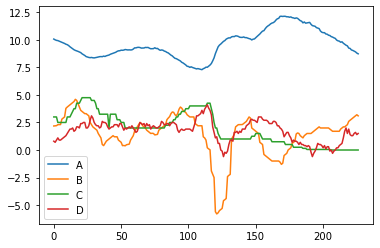

In [104]:
x = np.array([i for i in range(len(df))])


plt.plot(x,df["A"], label = "A")
plt.plot(x,df["B"] , label = "B")
plt.plot(x,df["C"], label = "C")
plt.plot(x,df["D"], label = "D")
plt.legend()
plt.show()

# Standard Linear Regression

In [105]:
model = LinearRegression()

In [106]:
model.fit(x_train,y_train)

LinearRegression()

In [107]:
x_test.head(1)

,A,B,C,D
66,9.25,2.2,2.0,2.3


In [108]:
model.predict(x_test)

array([ 2.29432095,  1.90180827,  0.40484564,  2.39513335,  2.64448837,
        1.54930263,  2.43149129,  2.53501582,  3.05392583, -0.67219474,
        1.38910275,  2.09930143,  2.33775974,  2.68727922,  1.98197585,
        2.06210995,  0.83347795,  2.26178918,  2.48244214,  3.21317086,
        1.38497209,  1.28972427,  1.89016344,  0.40378103,  0.74411123,
        1.72720806,  1.67844769,  2.25420525,  3.00093987,  2.56950903,
        0.59579517,  0.02276425,  1.94879997,  1.0941133 ,  2.05288844,
        2.05769029,  3.06664521,  2.18182631,  1.85919667,  0.11861795,
        3.06263283,  2.07515875,  0.88059433, -0.46155207,  0.49562237,
        0.67764899,  1.97496376,  1.87453417,  2.30180255,  3.76152663,
        0.43661388,  2.90977755, -0.38675335,  1.91563774,  0.3733097 ,
        1.97917728,  0.97549684])

In [109]:
r2_score(y_test, model.predict(x_test))

0.9345648446169303

# Regularisation

In [115]:
myalphas = np.logspace(-6, 6, 13)
train_sizes = 150, 10

models = LinearRegression, RidgeCV, LassoCV
model_names = 'linear regression', 'Ridge regression using CV', 'Lasso regression using CV'

for train_size in train_sizes:
    print('Training with this many datapoints: ', train_size)
    for i, model in enumerate(models):
        print('Using regression of type: ', model_names[i])
        if model == LinearRegression:
            reg = model()
        else:
            print('Trying these complexity parameter values (i.e.alphas): ', myalphas)
            reg = model(alphas=myalphas)
        reg.fit(x_train,y_train)

        if model != LinearRegression:
            print('Using cross-validation got this value for the complexity parameter: ', reg.alpha_)
        for i, name in enumerate(["A","B","C","D"]):
            print('Parameter for {0} is {1}'.format(name,reg.coef_[i]))

        print('Error on held out set is: ', reg.score(x_test,y_test))
        print('\n\n')

Training with this many datapoints:  150
Using regression of type:  linear regression
Parameter for A is -0.011828950506621035
Parameter for B is 0.03657504102496643
Parameter for C is -0.0008345407969072093
Parameter for D is 0.9349738936205683
Error on held out set is:  0.9345648446169303



Using regression of type:  Ridge regression using CV
Trying these complexity parameter values (i.e.alphas):  [1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03
 1.e+04 1.e+05 1.e+06]
Using cross-validation got this value for the complexity parameter:  0.1
Parameter for A is -0.0118477268673427
Parameter for B is 0.036570426520601274
Parameter for C is -0.00045851140292541004
Parameter for D is 0.9339504132543555
Error on held out set is:  0.9345551898740831



Using regression of type:  Lasso regression using CV
Trying these complexity parameter values (i.e.alphas):  [1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03
 1.e+04 1.e+05 1.e+06]
Using cross-valid